In [ ]:
import numpy as np
import pandas as pd
from sympy import *
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.interpolate import lagrange


# Diferenciación numérica

Cuando se practica una operación en una función tabulada $(x,f(x))$, se tiene que aproximar los datos por alguna función $(p_n(x))$ y efectuar la operación en la función $p_n(x)$.

Entonces, para diferenciar una función tabulada $(x,f(x))$, se aproximará los datos a una función $p_n(x)$ y se diferenciará esta última.

$$f(x) = p_n(x) + R_n(x)$$

donde $R_n(x)$ es el error que se comente al aproximar.

La aproximación a la primera derivada es

$$\dfrac{df(x)}{dx}\approx \dfrac{dp_n(x)}{dx}$$

y para la $n-\text{ésima}$ derivada

$$\begin{align*}
\dfrac{d^nf(x)}{dx^n}&\approx \dfrac{d^np_n(x)}{dx^n}\\
&\dfrac{d^np_n(x)}{dx^n}+\dfrac{d^nR_n(x)}{dx^n}
\end{align*}$$

Si el tamaño de paso $h$ es regular en todo el intervalo, entonces $p_n(x)$ puede escribirse en diferencias finitas:

$$p_n(x) = f[x_0] + (x_x0)\dfrac{\Delta f[x_0]}{h} + (x-x_0)(x-x_1)\dfrac{\Delta^2 f[x_0]}{2!h^2} + \ldots + (x-x_0)(x-x_1)\ldots(x-x_{n-1})\dfrac{\Delta^n f[x_0]}{n!h^n}$$

y la aproximación a la primera derivada es

$$\begin{align*}
\dfrac{df(x)}{dx}\approx \dfrac{dp_n(x)}{dx} &= \dfrac{df[x_0]}{dx} + \dfrac{d\left[(x-x_0)\dfrac{\Delta f[x_0]}{h}\right]}{dx} + \dfrac{d\left[(x-x_0)(x-x1)\dfrac{\Delta^2 f[x_0]}{2!h^2}\right]}{dx}\\
& +\ldots+\dfrac{d\left[(x-x_0)(x-x_1)\ldots(x-x_{n-1})\dfrac{\Delta^n f[x_0]}{n!h^n}\right]}{dx}
\end{align*}$$

Desarrollando los primeros términos

$$\begin{align*}
\dfrac{df(x)}{dx}\approx \dfrac{dp_n(x)}{dx} &= \dfrac{\Delta f[x_0]}{h} + (2x-x_0-x_1)\dfrac{\Delta^2 f[x_0]}{2!h^2} \\
&+ \left[3x^2-2(x_0+x_1+x_2)x + (x_0x_1+x_0x_2+x_1x_2)\right]\dfrac{\Delta^3f[x_0]}{3!h^3} 
\end{align*}$$

Si $n=1$, la función tabulada se aproxima por un polinomio de grado uno:

$$p_n(x)=p_1(x)=f[x_0]+(x-x_0)\dfrac{\Delta f[x_0]}{h}$$

> Entonces, la primera derivada está dada por

$$\begin{align*}
\dfrac{df(x)}{dx}&\approx \dfrac{dp_1(x)}{dx} = \dfrac{\Delta f[x_0]}{h} = \dfrac{f[x_1]-f[x_0]}{x_1-x_0} = f[x_0,x_1]\\
&\approx \dfrac{f(x_1)-f(x_0)}{h}
\end{align*}$$

La segunda derivada de $p_1(x)$ es

$$\dfrac{d^2f(x)}{dx^2}\approx \dfrac{d^2p_1(x)}{dx^2}=0$$




Si $n=2$,  la función tabulada se aproxima por un polinomio de grado dos:

$$\dfrac{df(x)}{dx}\approx \dfrac{dp_2(x)}{dx}=\dfrac{\Delta f[x_0]}{h}+(2x-x_0-x_1)\dfrac{\Delta^2 f[x_0]}{2!h^2}$$

Aplicando diferencias hacia adelante

$$\dfrac{df(x)}{dx}\approx \left(\dfrac{2x-x_0-x_1-2h}{2h^2}\right)f(x_0) + \left(\dfrac{2x_0-4x+2x_1+2h}{2h^2}\right)f(x_1) + \left(\dfrac{2x-x_0-x_1}{2h^2}\right)f(x_2)$$

La segunda derivada se obtiene derivando una vez más con respecto a $x$

$$\begin{align*}
\dfrac{d^2f(x)}{dx^2}&\approx \dfrac{d^2p_2(x)}{dx^2} = \dfrac{\Delta^2 f[x_0]}{h^2} = 2f[x_0,x_1,x_2]\\
&\approx \dfrac{1}{h^2}f(x_0)-\dfrac{2}{h^2}f(x_1)+\dfrac{1}{h^2}f(x_2)
\end{align*}$$


**Ejemplo**

La ecuación de Van der Walls para gmol de $\mathrm{CO_2}$ es:

$$(P + \frac{a}{v^2})(v - b) = R\,T$$
donde:

$a = 3.6\times 10^{-6}\, \mathrm{atm\,cm^6/gmol^2}$

$b = 42.8\, \mathrm{cm^3/gmol}$

$R = 82.1\, \mathrm{atm\,cm^3/ (gmol\,K)}$

Si $\mathrm{T = 350\,K}$, se obtiene la siguiente tabla de valores:

|Puntos|	0|	1|	2|	3|
|---   |---|---|---|---|
|$\mathrm{P(atm)}$|	13.782|	12.577|	11.565|	10.704|
|$\mathrm{v(cm^3)}$|	2000|	2200	|2400	|2600|

Calcule $\partial P/\partial v$ cuando $v = \mathrm{2300\,cm^3}$ y compárelo con el valor de la derivada analítica.

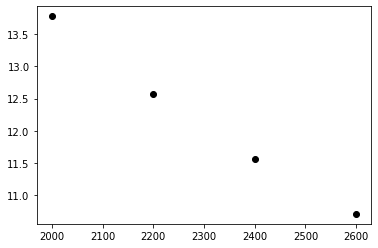

In [ ]:
x = np.array([2000, 2200, 2400, 2600])
y = np.array([13.782, 12.577, 11.565, 10.704])
plt.plot(x,y,"ko")
plt.show()

Utilizando 

$$\dfrac{df(x)}{dx}\approx \left(\dfrac{2x-x_0-x_1-2h}{2h^2}\right)f(x_0) + \left(\dfrac{2x_0-4x+2x_1+2h}{2h^2}\right)f(x_1) + \left(\dfrac{2x-x_0-x_1}{2h^2}\right)f(x_2)$$


In [ ]:
h = 200
def dpdv(v):
  return ((2*v - x[0]-x[1]-2*h)/(2*h**2))*y[0] + ((2*x[0] - 4*v+2*x[1]+ 2*h)/(2*h**2))*y[1] + ((2*v - x[0]-x[1])/(2*h**2))*y[2]

In [ ]:
dpdv(2300)

-0.005059999999999995

In [ ]:
"""
Vamos a utilizar SymPy para:
1) crear la expresión
2) encontrar la derivada analítica
3) pasar un expresión símbolica a expresión evaluable numéricamente
"""
# Creamos las variables dependiente e independiente
P, v = symbols("P v")
# Asignamos valor a las constantes
a, b, R, T = 3.6e-6, 42.8, 82.1, 350
# Creamos la expresión
expr = (P + a/v**2)*(v - b) - R*T
# Resolvemos para la presión P
P = solve(expr,P)
# Mostramos la ecuación obtenida para P
print (P)

[4.0e-7*(359187500000.0*v**2 - 45.0*v + 1926.0)/(v**2*(5.0*v - 214.0))]


In [ ]:
# Para Calcular la derivada le debemos indicar que utilice el elemento cero de la lista
dpdv = diff(P[0],v)
print (dpdv)

4.0e-7*(718375000000.0*v - 45.0)/(v**2*(5.0*v - 214.0)) - 4.36719364136606e-11*(359187500000.0*v**2 - 45.0*v + 1926.0)/(v**2*(0.0233644859813084*v - 1)**2) - 8.0e-7*(359187500000.0*v**2 - 45.0*v + 1926.0)/(v**3*(5.0*v - 214.0))


In [ ]:
# Evaluamos la derivada en 2300; para ello usamos la función subs
# donde v es la variable que se va sustituir con el valor de 2300.
dpdv.subs(v,2300)

-0.00563989629389647

Aquí vamos a usar el método _derivative_ de la biblioteca scipy

In [ ]:
# from scipy.misc import derivative

# lambdify permite convertir una expresión SymPy a una equivalente de numpy o de scipy
# para que sea evaluable numericamente.

pv = lambdify(v,P[0],"scipy")

In [ ]:
derivative(pv,2300,dx=1)

-0.005639897400853577

**Ejemplo**


En una reacción química $\mathrm{A + B}\xrightarrow{k} \mathrm{productos}$, la concentración del reactante A es una función de la presión $\mathrm{(P)}$ y la temperatura $\mathrm{(T)}$. La siguiente tabla presenta la concentración de $\mathrm{A}$ en $\mathrm{gmol/L}$ como función de estas dos varibales.

|$\mathrm{P(kg/cm^2)}$|	273 K|	300 K|	325 K|	360 K|
|---|---|---|---|---|
|1	|0.99|	0.97|	0.96|	0.93|
|2	|0.88|	0.82|	0.79|	0.77|
|8	|0.62|	0.51|	0.48|	0.45|
|15	|0.56|	0.49|	0.46|	0.42|
|20	|0.582|	0.44|	0.41|	0.37|

Calcule la variación de la concentración de $\mathrm{A}$ con la temperatura $(\dfrac{\partial C_A}{\partial T})$ a $\mathrm{P = 8\,kg/cm^2}$ y $\mathrm{T = 300\,K}$.

Vamos a usar: 

$$\dfrac{dp_n(x)}{dx} = \sum_{i=0}^n\dfrac{f(x_i)}{\prod_{j=0\\j\neq i}^n(x_i-x_j)}\sum_{k=0\\k\neq i}^n \prod_{j\neq k,i}^n (x-x_j)$$

Para cuando $n=2$

$$\dfrac{dp_2(x)}{dx} = \dfrac{(2x-x_1-x_2)f(x_0)}{(x_0-x_1)(x_0-x_2)} +  \dfrac{(2x-x_0-x_2)f(x_1)}{(x_1-x_0)(x_1-x_2)} +  \dfrac{(2x-x_0-x_1)f(x_2)}{(x_2-x_0)(x_2-x_1)}$$

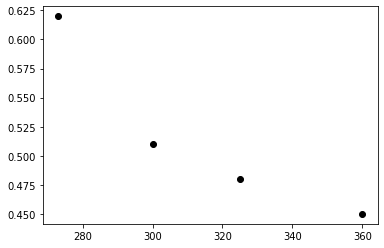

In [ ]:
x = np.array([273,300,325, 360])
y = np.array([0.62, 0.51, 0.48, 0.45])
plt.scatter(x,y, color = "black")
plt.show()

In [ ]:
def dCAdT(T,x,y):
  Ter1 = ((2*T-x[1]-x[2])*y[0])/ ((x[0]-x[1])*(x[0]-x[2]))
  Ter2 = ((2*T-x[0]-x[2])*y[1])/ ((x[1]-x[0])*(x[1]-x[2]))
  Ter3 = ((2*T-x[0]-x[1])*y[2])/ ((x[2]-x[0])*(x[2]-x[1]))
  return Ter1 + Ter2 + Ter3

In [ ]:
dCAdT(300,x,y)

-0.0025817663817663816

Para este ejemplo vamos a utilizar el método  [_gradient_](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) de la biblioteca numpy. Este método permite calcular el gradiente de un arreglo N dimensional que contiene muestras de una función escalar.

In [ ]:
# Creamos un arreglo C_A con los datos de la variable dependiente
C_A = np.array([0.62, 0.51, 0.48, 0.45])
# Creamos un arreglo T con los datos de la variable independiente
T = np.array([273, 300, 325, 360])

# Enviamos los arreglos al método gradient
VarC_A = np.gradient(C_A,T)

print (VarC_A)

[-0.00407407 -0.00258177 -0.00105714 -0.00085714]


In [ ]:
"""
La variación de la concentración a T = 300 y P = 8 es el primer elemento
del arreglo que regresa el método gradient
"""

print (VarC_A[1])

-0.0025817663817663816


**Ejemplo**

Obtenga la primera y segunda derivadas evaluadas en $x = 1$ para la siguiente función tabulada.

|Puntos|	0|	1|	2|	3|	4|
|---|---|---|---|---|---|
|$x$|	-1|	0	|2	|5	|10 |
|$f(x)$|	11|	3|	23|	143|	583|

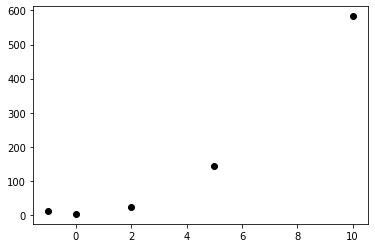

In [ ]:
x = np.array([-1,0, 2, 5, 10]) 
y = np.array([11,3, 23, 143, 583])
plt.scatter(x,y,color="black",marker="o")
plt.show()

### Usando diferencias divididas

In [ ]:
def dif_div(x, y):
    '''
    Calcula la tabla de diferencias divididas
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # La primer columna es y
    coef[:,0] = y    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

In [ ]:
dif_div(x,y)

array([[ 11.,  -8.,   6.,   0.,   0.],
       [  3.,  10.,   6.,   0.,   0.],
       [ 23.,  40.,   6.,   0.,   0.],
       [143.,  88.,   0.,   0.,   0.],
       [583.,   0.,   0.,   0.,   0.]])

In [ ]:
df_DD = pd.DataFrame(data=dif_div(x,y), columns=["f(x)", "1ra","2da","3ra","4ta"])

In [ ]:
df_DD

,f(x),1ra,2da,3ra,4ta
0,11.0,-8.0,6.0,0.0,0.0
1,3.0,10.0,6.0,0.0,0.0
2,23.0,40.0,6.0,0.0,0.0
3,143.0,88.0,0.0,0.0,0.0
4,583.0,0.0,0.0,0.0,0.0


El polinomio de Newton de segundo grado en diferencias divididas es

$$p_2(x)=f[x_0] + (x-x_0)f[x_0,x_1]+(x-x_0)(x-x_1)f[x_0,x_1,x_2]$$

Su primera derivada de $p_2(x)$ es

$$\dfrac{dp_2(x)}{dx}=f[x_0,x_1] + (2x-x_0-x_1)f[x_0,x_1,x_2]$$

> Evaluando $\dfrac{dp_2(x)}{dx}|_{x=1}$

$$\dfrac{dp_2(1)}{dx} = -8 + (2(1)-(-1)-0)(6) = 10 $$

La segunda derivada de $p_2(x)$ es

$$\dfrac{d^2p_2(x)}{dx} = 2f[x_0,x_1,x_2]$$

> Evaluando $\dfrac{dp^2_2(x)}{dx^2}|_{x=1}$

$$\dfrac{dp^2_2(1)}{dx^2} =2(6)=12 $$


### Usando aproximación polinomial

In [ ]:
# El polinomio resultante se almacenará en la varible pol
pol = lagrange(x,y)    # Enviamos los datos de x y fx al método lagrange
print(pol)

           4            3     2
2.776e-17 x + 2.22e-16 x + 6 x - 2 x + 3


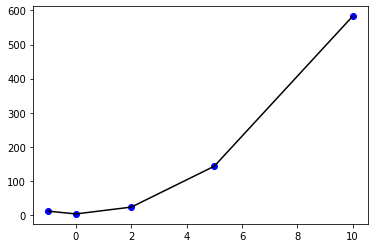

In [ ]:
x = np.array([-1,0, 2, 5, 10]) 
y = np.array([11,3, 23, 143, 583])
plt.scatter(x,y,color="blue",marker="o")
plt.plot(x,pol(x),color="black", linestyle = "solid")
plt.show()

In [ ]:
"""
Calculamos la derivada del polinomio de lagrange usando el método
derivative, y lo evaluyamos en x = 1
"""
derivative(pol,1, n=1)

10.000000000000004

In [ ]:
"""
Calculamos la segunda derivada del polinomio de lagrange usando el método
derivative, y lo evaluyamos en x = 1
"""
derivative(pol,1, n=2)

12.000000000000005